In [28]:
import os
import re
import json
from tqdm.notebook import tqdm
from textwrap import dedent

import numpy as np
import pandas as pd
from scipy import ndimage
from scipy import optimize 
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import utils

def scatter(w, k):
    return np.log10(k / w**4)

def r_squared(y, y_hat):
    residuals = y - y_hat
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared


root_dir_walk = os.walk('..')

plate_files = []

experiment_configs = {}

for dirpath, dirnames, filenames in root_dir_walk:
    if (e := re.search('\.\./([0-9]+)', dirpath)) is not None:
        experiment_number = int(e.group(1))
        data = {}
        if 1 <= experiment_number <= 22:
            #if experiment_number not in experiment_configs.keys():
            for filename in filenames:
                fpath = os.path.join(dirpath, filename)
                if filename.split('.')[-1] == 'CSV' and 'pathlength' not in filename.lower():
                    plate_files.append(fpath)
                if re.search('experiment-[0-9]+-summary\.csv', filename) is not None:
                    data['summary_fname'] = filename 
                    data['summary_path'] = fpath
                if re.search('config\_[0-9]+\.json', filename) is not None:
                    data['config_fname'] = filename 
                    if 'config' not in data.keys():
                        with open(fpath, 'r') as f:
                            data['config'] = json.load(f)
            if data != {}:
                experiment_configs[experiment_number] = data

configs_df = pd.concat([pd.read_csv(experiment_configs[i]['summary_path']) for i in experiment_configs]).reset_index(drop=True)


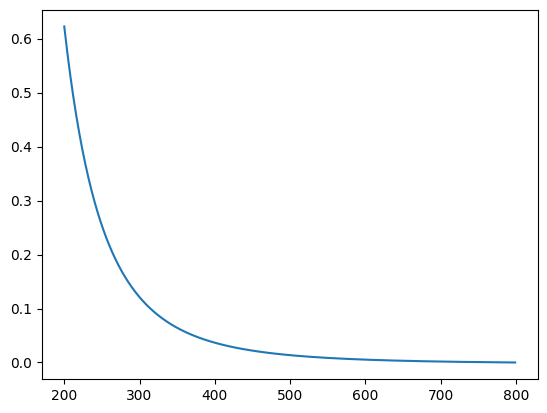

In [107]:
wavelengths = np.arange(200, 800).astype(float)
k = 1e9

def scatter(w, k):
    return k / w**4

y = scatter(wavelengths, k)
y -= y[-1]
plt.plot(wavelengths, y)
plt.show()

In [87]:
np.log(1/ 300 ** -4)

22.815129898624804